In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data['data'])
breast_cancer_df.columns = data['feature_names']
breast_cancer_df['diagnosis'] = [data['target_names'][x] for x in data['target']]
feature_names= data['feature_names']
breast_cancer_df['target'] = data['target']

In [225]:
breast_cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst perimeter  worst area  \
0                   0.07871  ...           184.60      2019.0   
1                   0.05667  ...           158.80      1956.0   
2                   0.05999  ...           152.50      1709.0   
3                   0.09744  ...            98.87       567.7   
4                   0.05883  ...           152.20      1575.0   
..                      ...  ...              ...         ...   
564                 0.05623  ...           166.10      2027.0   
565                 0.05533  ...           155.00      1731.0   
566                 0.05648  ...           126.70      1124.0   
567                 0.07016  ...           184.60      1821.0   
568                 0.05884  ...            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  diagnosis  \
0                  0.2654          0.4601                  0.11890  malignant   
1                  0.1860          0.2750                  0.08902  malignant   
2                  0.2430          0.3613                  0.08758  malignant   
3                  0.2575          0.6638                  0.17300  malignant   
4                  0.1625          0.2364                  0.07678  malignant   
..                    ...             ...                      ...        ...   
564                0.2216          0.2060                  0.0

In [226]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [227]:
breast_cancer_df['diagnosis'].value_counts()

benign       357
malignant    212
Name: diagnosis, dtype: int64

In [228]:
df = breast_cancer_df.copy()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
target                     0
dtype: int64

In [229]:
df_m = df[df['target'] == 0]
df_b = df[df['target'] == 1]

### Creating scatter plots to look at the data

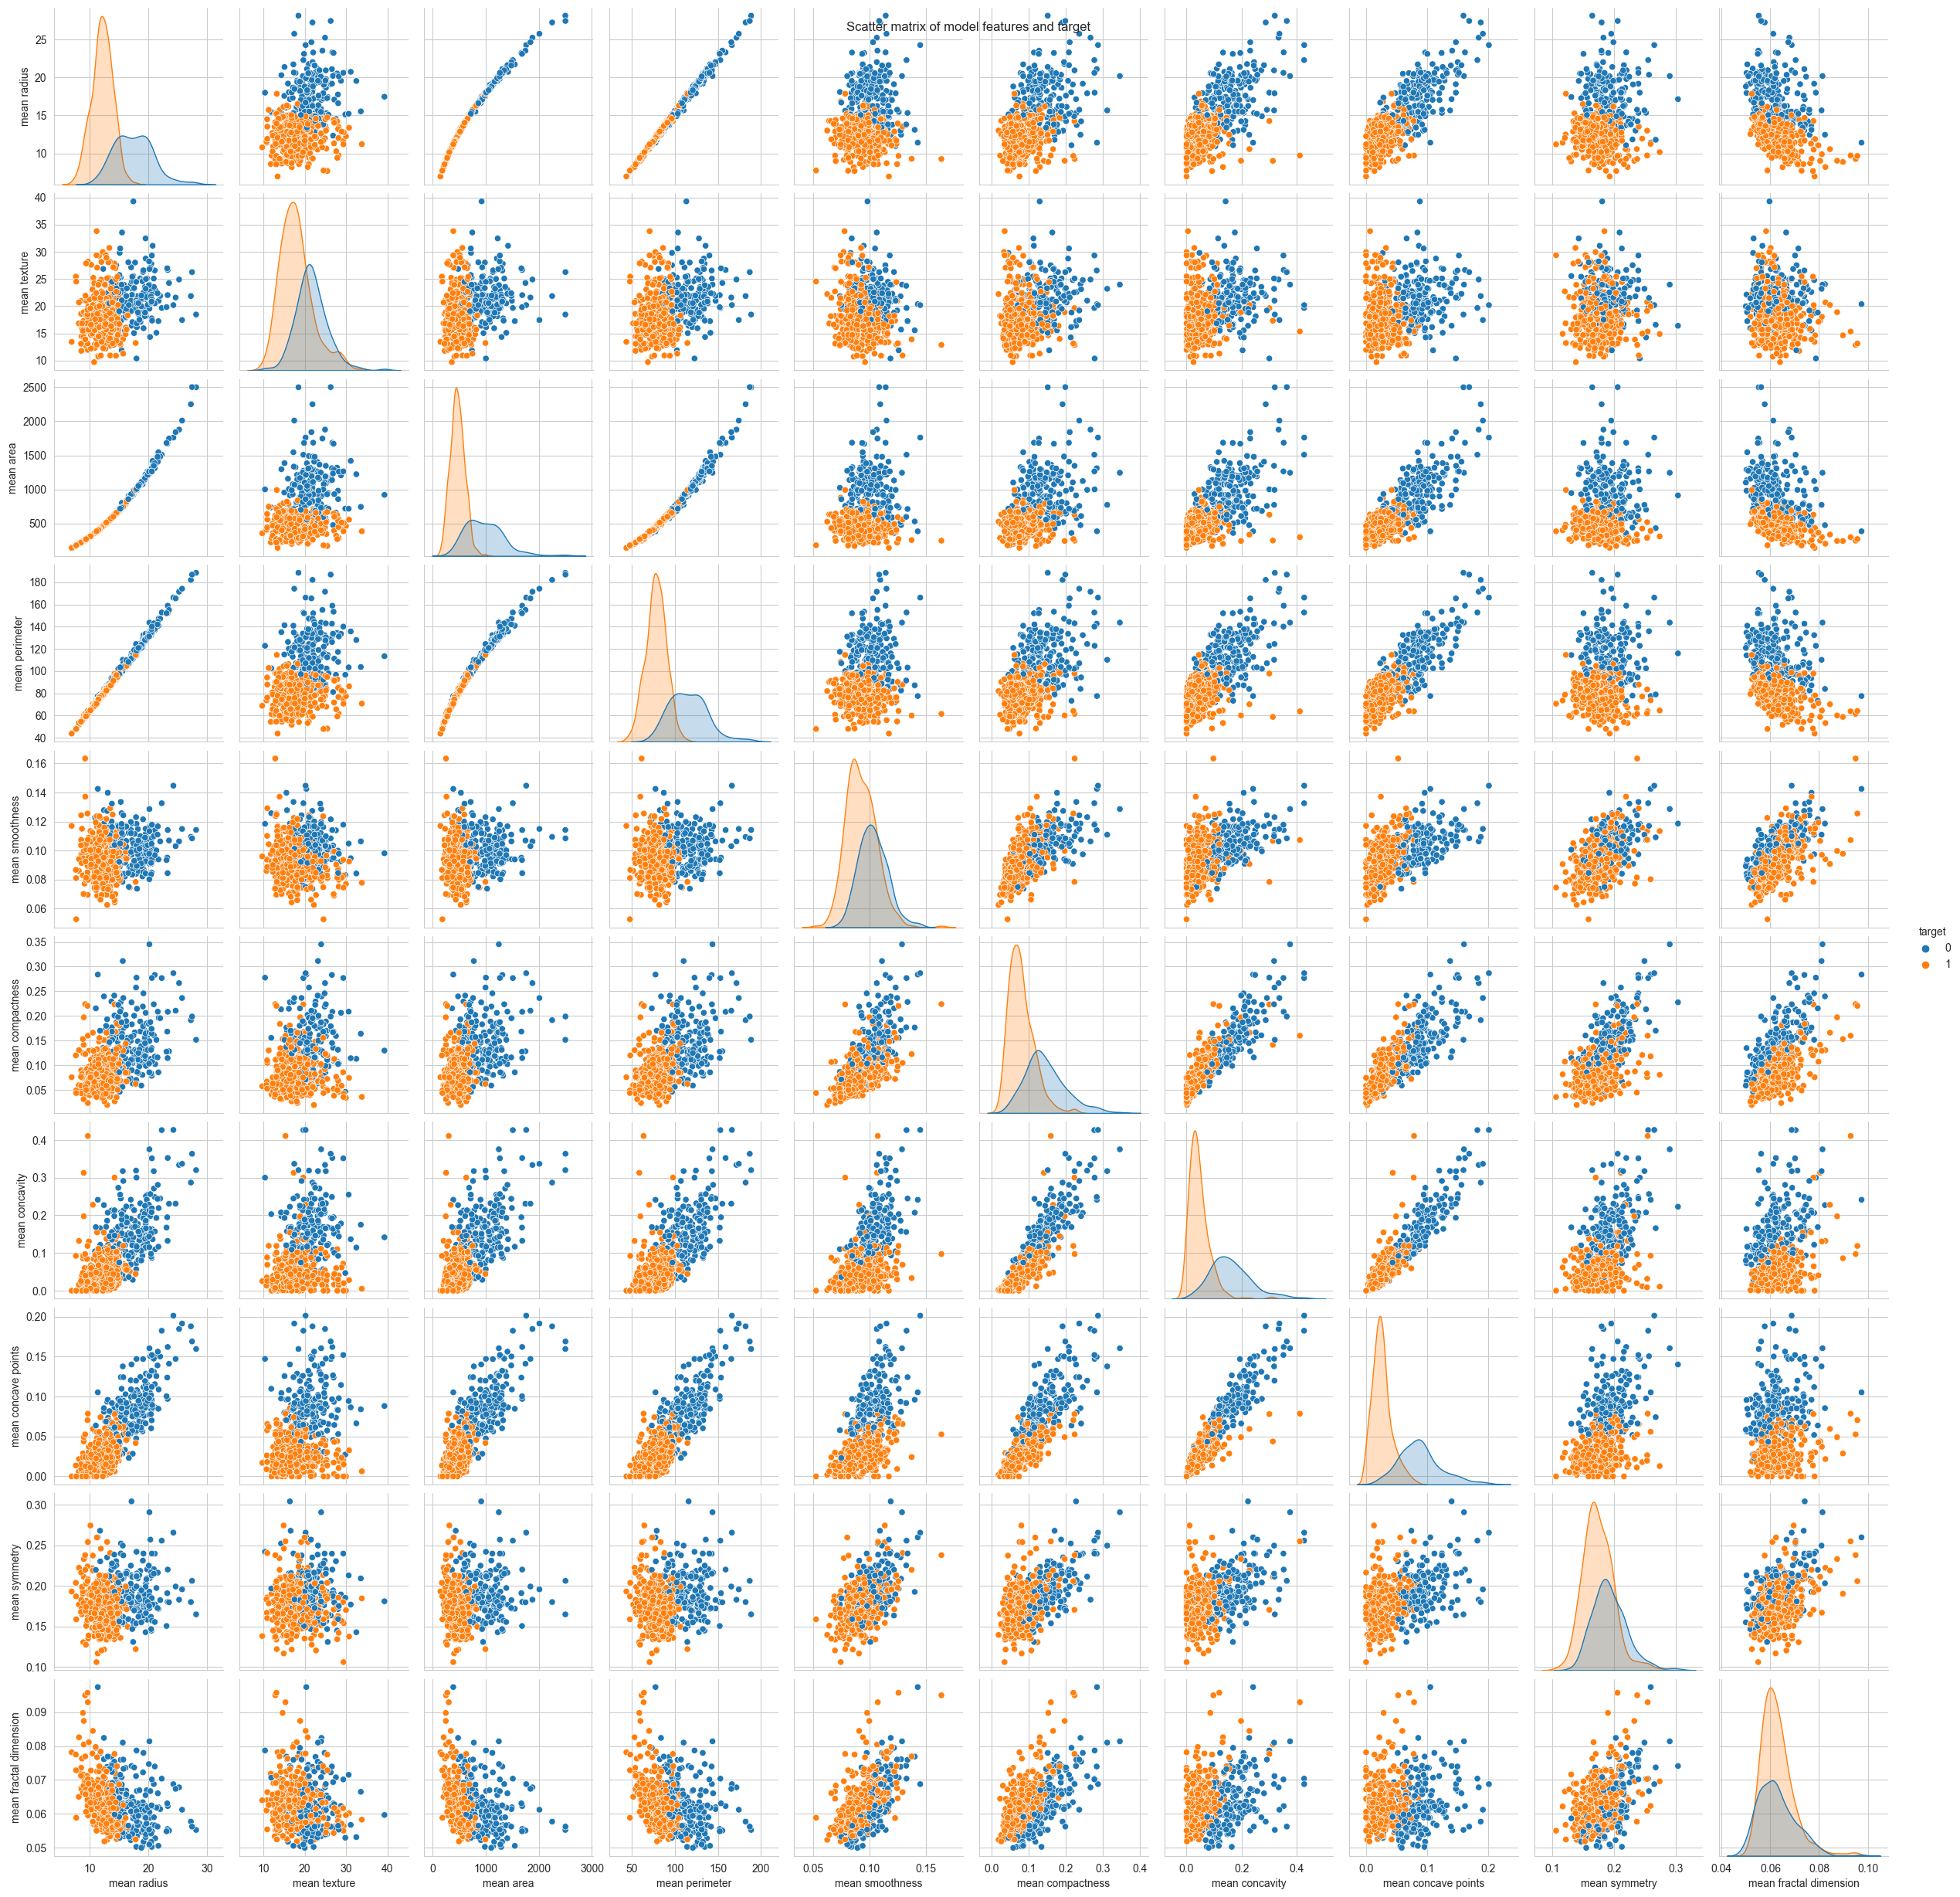

In [230]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness','mean compactness','mean concavity', 'mean concave points','mean symmetry','mean fractal dimension'])
plt.suptitle('Scatter matrix of model features and target ')
plt.show()

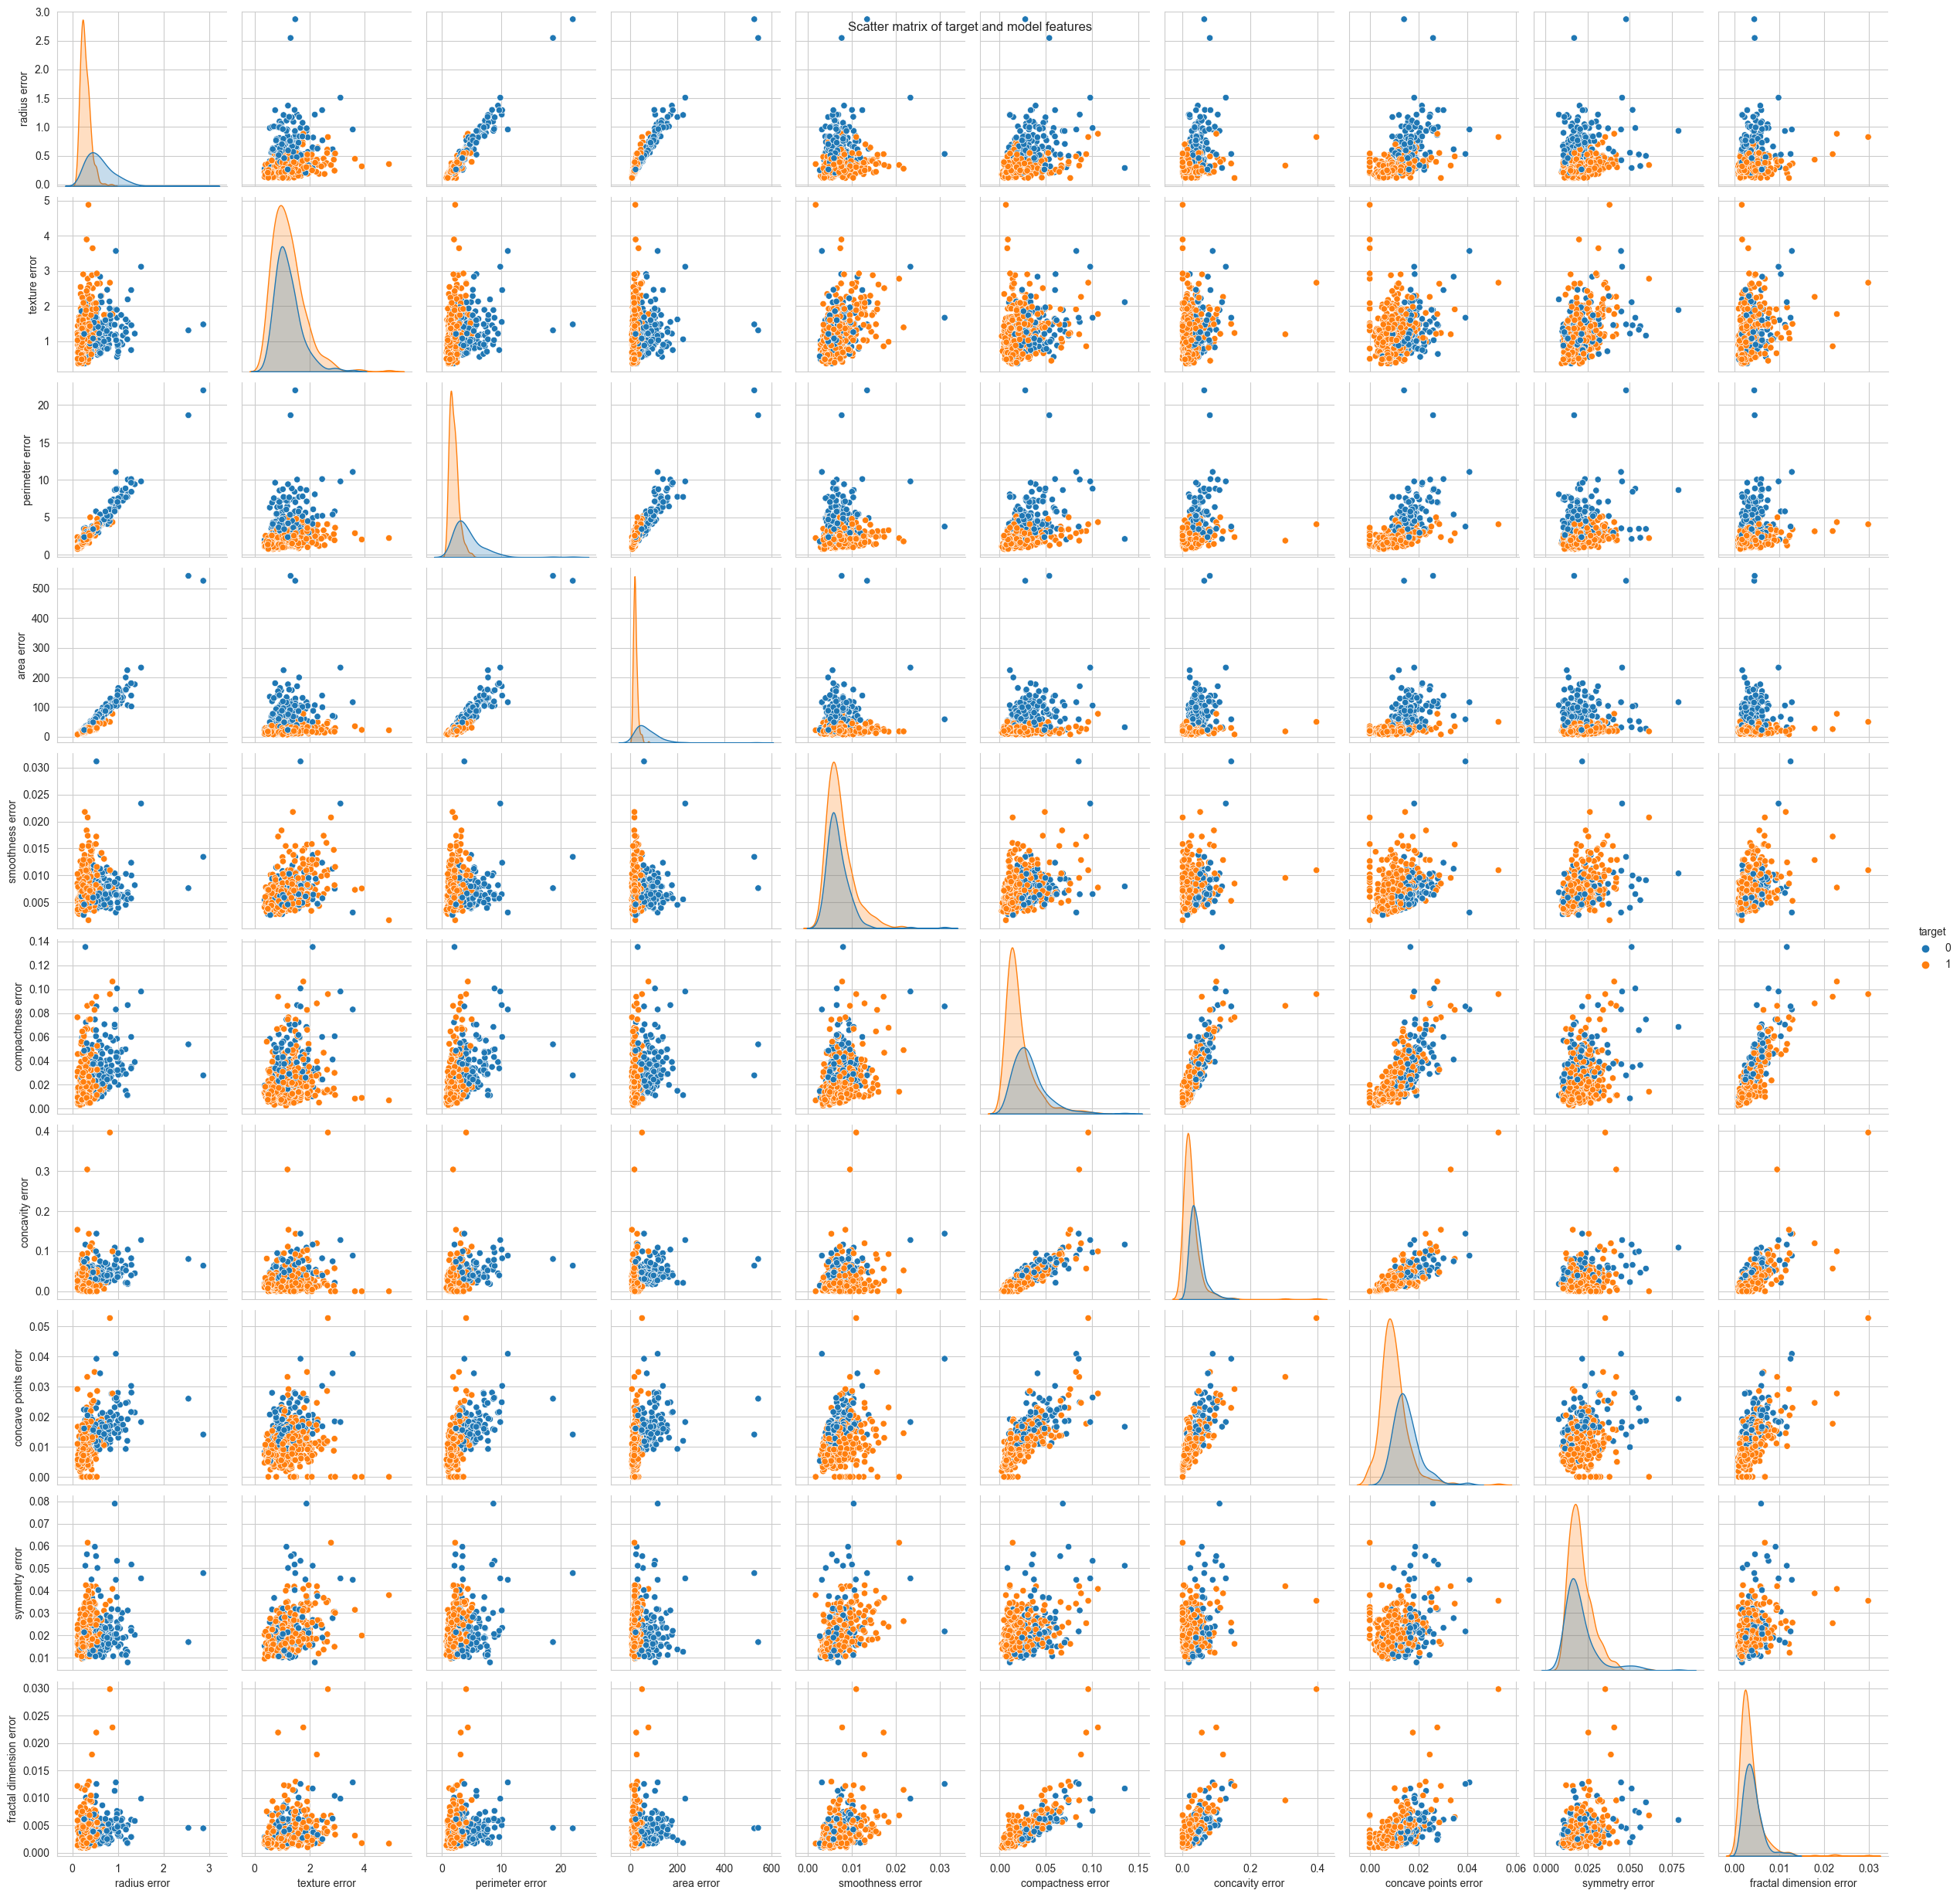

In [143]:
sns.pairplot(df, hue = 'target', vars = ['radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error'] )
plt.suptitle('Scatter matrix of model features and target')
plt.show()

### Creating box plots to look at the data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


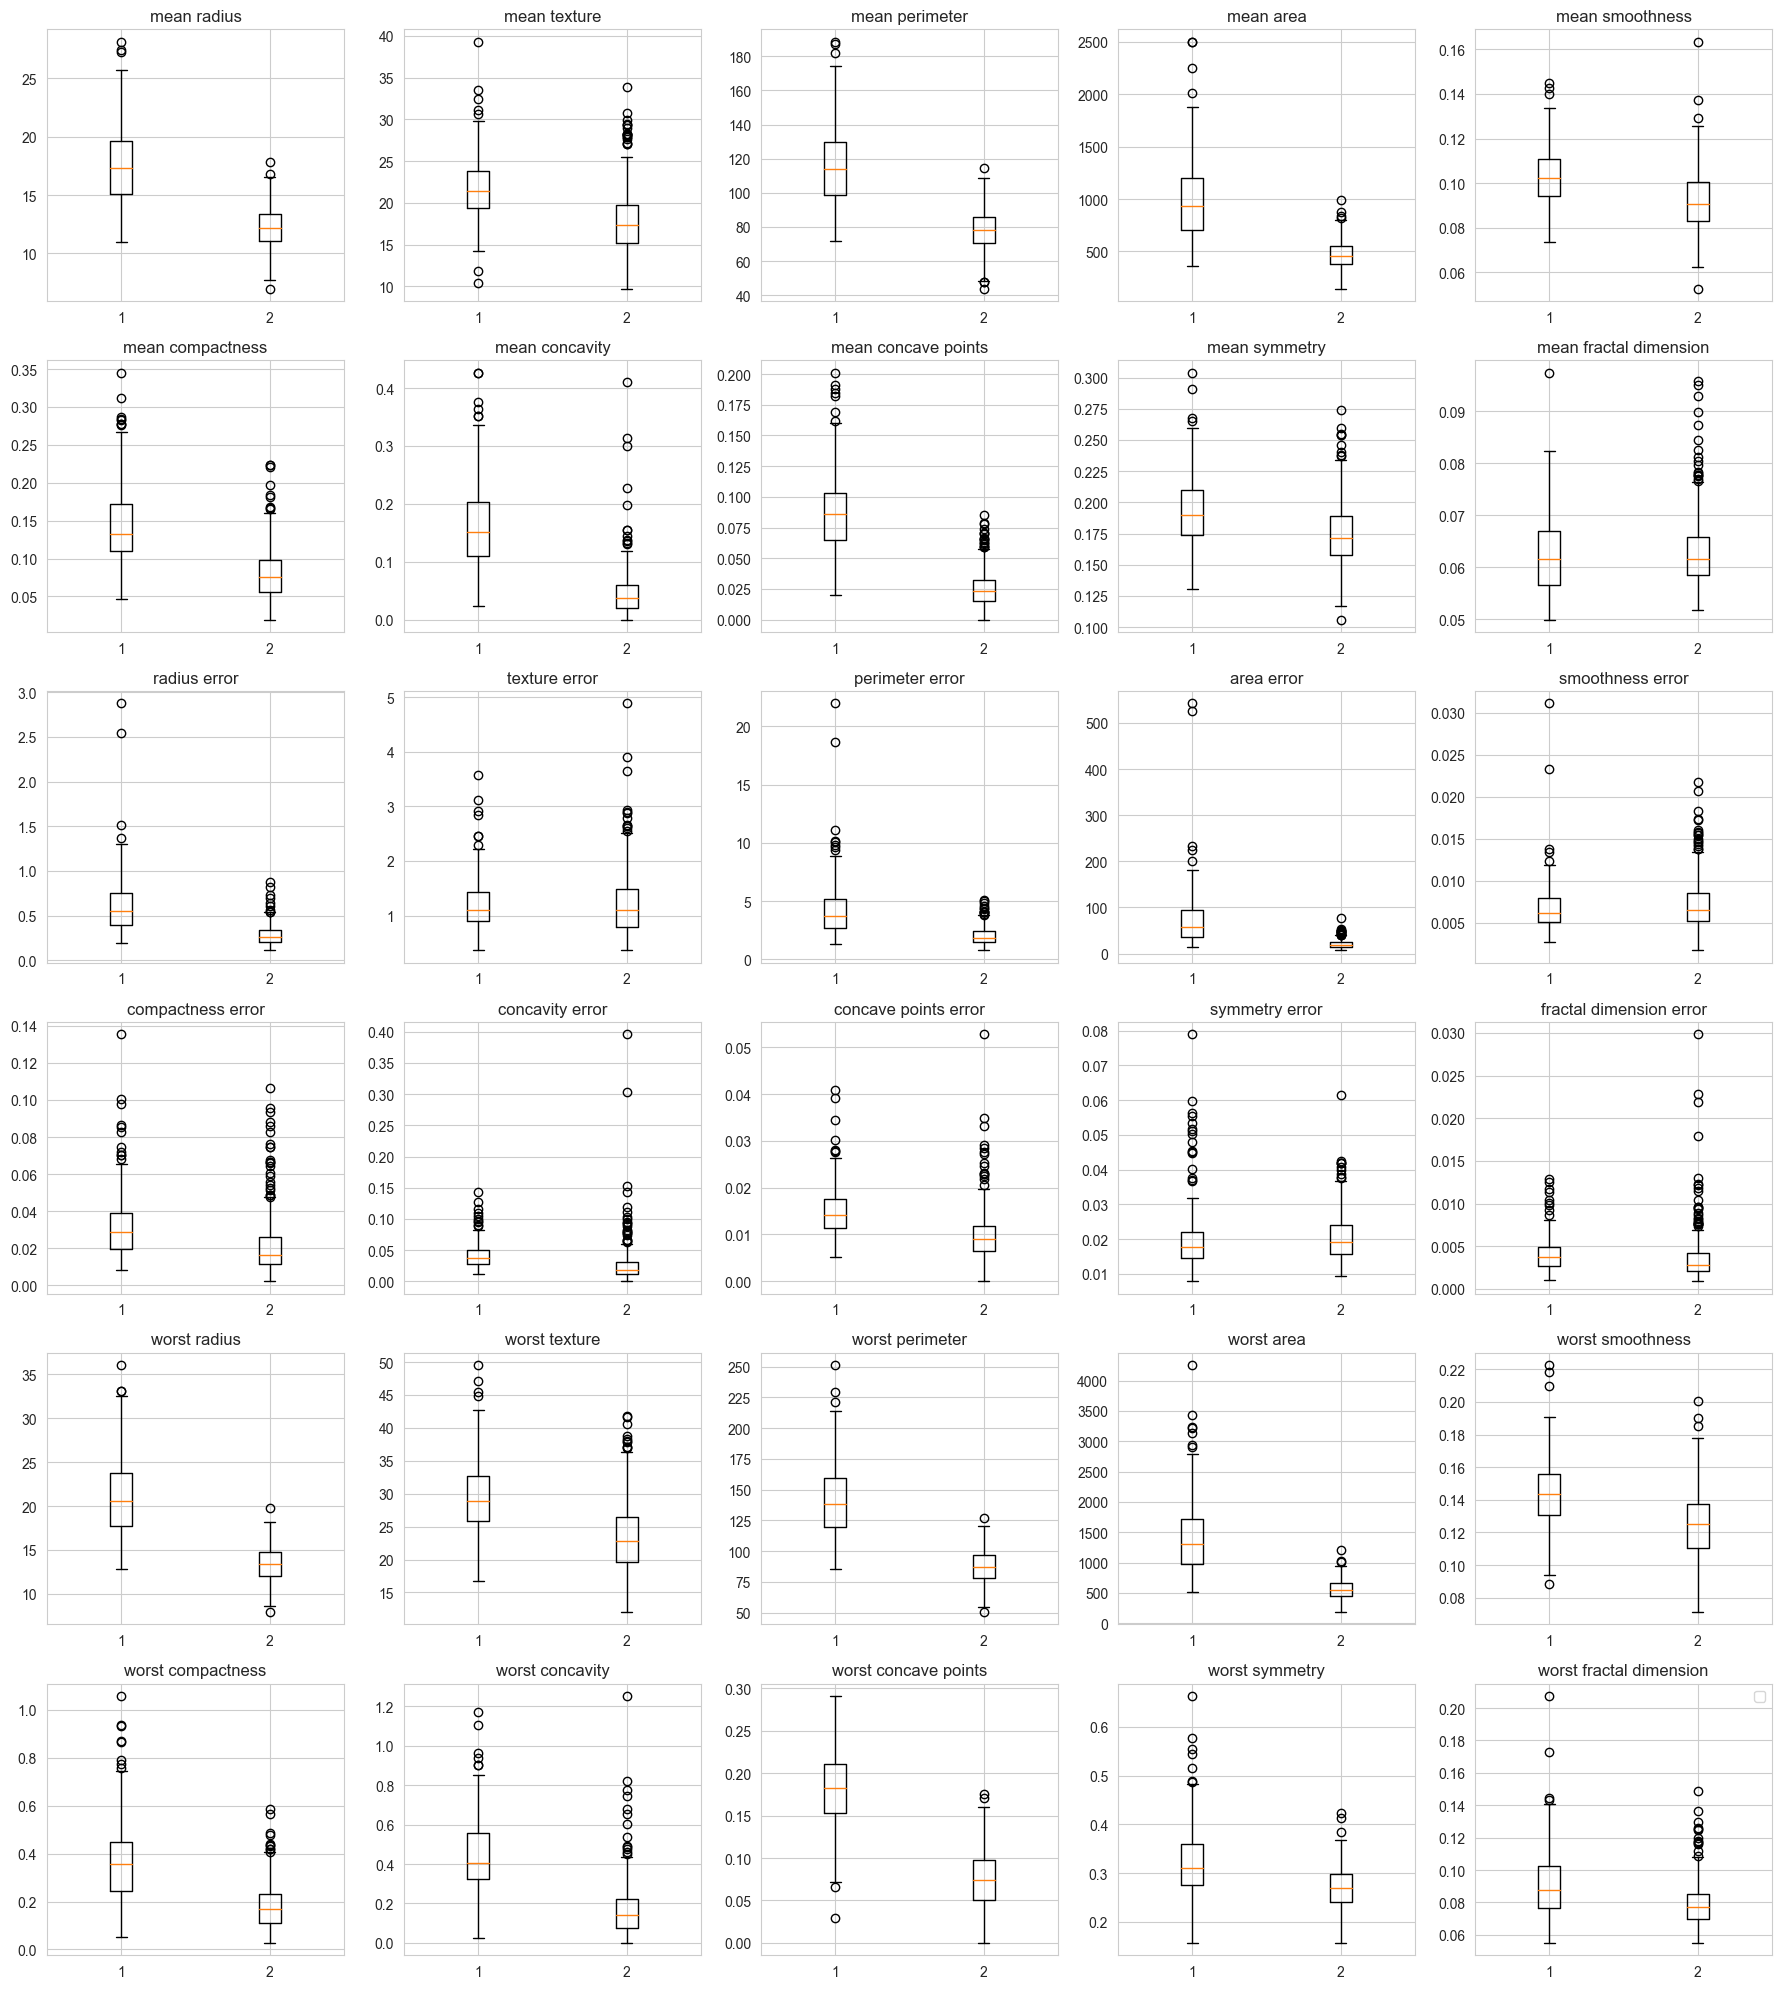

In [145]:
fig = plt.figure(figsize=(18,20))

for i,col in enumerate(list(df.columns[0:30])):
    i +=1
    ax = fig.add_subplot(6,5,i)
    
    ax.boxplot([df_m[col], df_b[col]])

    ax.set_title(col)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

## Encoding Categorical data

In [231]:
le = LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  diagnosis  target  
0                  0.11890          1       0  
1                  0.08902          1       0  
2                  0.08758          1       0  
3                  0.17300          1       0  
4                  0.07678          1       0  

[5 rows x 32 columns]

In [232]:
df.drop(['target'], axis = 1, inplace = True)

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


## features scaling

In [233]:
mms = MinMaxScaler()

scale = mms.fit_transform(X)

print(scale)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


### Ml model Creation

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Decision  tree model

In [245]:
results = []
dt = DecisionTreeClassifier(random_state = 40)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
    
# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy", acc)
print("Precision", precision)
print("F1 Score ", f1)
results.append({
        'Classifier': 'decision tree',
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })



Accuracy 0.9035087719298246
Precision 0.8536585365853658
F1 Score  0.8641975308641976


## Logistic Regresssion model

In [246]:

LR = LogisticRegression(random_state = 40)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
    
# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy", acc)
print("Precision", precision)
print("F1 Score ", f1)
results.append({
        'Classifier': 'logistic regression',
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

Accuracy 0.9122807017543859
Precision 0.8947368421052632
F1 Score  0.8717948717948718


## Random Forest

In [247]:

RF =  RandomForestClassifier(random_state = 40)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
    
# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy", acc)
print("Precision", precision)
print("F1 Score ", f1)
results.append({
        'Classifier': 'Random Forest',
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

Accuracy 0.9298245614035088
Precision 0.9
F1 Score  0.9


### Comparing three models

In [248]:
# Convert results list to pandas DataFrame
df_results = pd.DataFrame(results)

# Display results DataFrame
print(df_results)

            Classifier  Accuracy  Precision  Recall        F1
0        decision tree  0.903509   0.853659   0.875  0.864198
1  logistic regression  0.912281   0.894737   0.850  0.871795
2        Random Forest  0.929825   0.900000   0.900  0.900000


### After evaluating the performance of these classifiers using accuracy, precision, recall, and F1-score metrics, we found that Random Forest had the highest accuracy of 92.9 % and also had good precision, recall, and F1-score values, indicating that it performed well in correctly identifying both malignant and benign tumors.

## calculate feature importances for decision tree model

In [239]:

dt_feature_scores = dt.feature_importances_

dt_feature_scores_df= pd.DataFrame({"Feature": X.columns,
                                          "Importance": dt_feature_scores})

dt_feature_scores_df = dt_feature_scores_df.sort_values("Importance", ascending=False)
dt_feature_scores_df

Feature  Importance
27     worst concave points    0.707687
23               worst area    0.122228
22          worst perimeter    0.044048
1              mean texture    0.026329
13               area error    0.019509
26          worst concavity    0.013281
21            worst texture    0.009311
11            texture error    0.009033
12          perimeter error    0.008680
4           mean smoothness    0.007790
15        compactness error    0.007523
20             worst radius    0.007011
29  worst fractal dimension    0.004674
7       mean concave points    0.004674
24         worst smoothness    0.004498
6            mean concavity    0.003725
28           worst symmetry    0.000000
2            mean perimeter    0.000000
3                 mean area    0.000000
25        worst compactness    0.000000
5          mean compactness    0.000000
10             radius error    0.000000
14         smoothness error    0.000000
8             mean symmetry    0.000000
19  fractal dimension error    0.000000
18           symmetry error    0.000000
17     concave points error    0.000000
16          concavity error    0.000000
9    mean fractal dimension    0.000000
0               mean radius    0.000000

It indicates that "worst concave points" is the most relevant feature for breast cancer diagnois. And the next few relevant features are  "worst area","mean texture","worst radius" and so on

## important features of logistic regression

In [240]:
# get the coefficients of the logistic regression model
lr_coefficients = LR.coef_[0]

lr_coefficients_df = pd.DataFrame({"Feature": X.columns,
                                       "Coefficient": abs(lr_coefficients)})

lr_coefficients_df = lr_coefficients_df.sort_values("Coefficient", ascending=False)

lr_coefficients_df

Feature  Coefficient
0               mean radius     0.686053
20             worst radius     0.675594
1              mean texture     0.639431
21            worst texture     0.638551
2            mean perimeter     0.470590
26          worst concavity     0.467370
25        worst compactness     0.372578
22          worst perimeter     0.274962
6            mean concavity     0.164970
11            texture error     0.157506
28           worst symmetry     0.144326
27     worst concave points     0.128320
13               area error     0.125266
5          mean compactness     0.115575
7       mean concave points     0.065470
12          perimeter error     0.049097
24         worst smoothness     0.048588
8             mean symmetry     0.046875
29  worst fractal dimension     0.036799
16          concavity error     0.033743
3                 mean area     0.026634
4           mean smoothness     0.025675
15        compactness error     0.024314
10             radius error     0.021242
23               worst area     0.011906
18           symmetry error     0.010886
9    mean fractal dimension     0.008033
17     concave points error     0.007714
14         smoothness error     0.002088
19  fractal dimension error     0.001987

The most relevant features according to logistic regression are "mean radius", "worst radius", m"mean texture", "worst texture" to classify breast cancer diagnosiss

## Grid Search on best  performed model

In [249]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3,5]
           }

In [250]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 40)
grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy', error_score='raise')
model_grid = grid.fit(X_train,y_train)

In [251]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))


Best hyperparameters are: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score is: 0.9757900546067155


In [252]:
best_estimator = grid.best_estimator_
accuracy = best_estimator.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Test accuracy:  0.9298245614035088


Hence it can be seen that best estimator by grid search cv performed almost similar to random forest base model